<a href="https://colab.research.google.com/github/victoriawhite17/Mushroom-Class/blob/main/Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSbR55nE3zGH4o6GSFb04uc53sychDYZWEgRfQbjLo79r2yuCfZuFUVz9LDKkE3uBVj9vuRGB7mElVS/pub?gid=2046584450&single=true&output=csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [77]:
ml_df = df.copy()

In [78]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##Checking for Missing Values and Dropping Duplicates

In [79]:
ml_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in our dataset. 

In [80]:
ml_df.duplicated().sum()

0

There are no duplicates in our dataset.

In [81]:
#checking for errors or any variations in data
print('Class')
print(ml_df['class'].value_counts())
print('Cap Shape')
print(ml_df['cap-shape'].value_counts())
print('Cap Surface')
print(ml_df['cap-surface'].value_counts())
print('Cap Color')
print(ml_df['cap-color'].value_counts())
print('Bruises')
print(ml_df['bruises'].value_counts())
print('Gill Attachment')
print(ml_df['gill-attachment'].value_counts())
print('Gill Spacing')
print(ml_df['gill-spacing'].value_counts())
print('Gill Size')
print(ml_df['gill-size'].value_counts())
print('Gill Color')
print(ml_df['gill-color'].value_counts())
print('Stalk Shape')
print(ml_df['stalk-shape'].value_counts())
print('Stalk Root')
print(ml_df['stalk-root'].value_counts())
print('Stalk Surface Above Ring')
print(ml_df['stalk-surface-above-ring'].value_counts())
print('Stalk Surface Below Ring')
print(ml_df['stalk-surface-below-ring'].value_counts())
print('Stalk Color Above Ring')
print(ml_df['stalk-color-above-ring'].value_counts())
print('Stalk Color Below Ring')
print(ml_df['stalk-color-below-ring'].value_counts())
print('Veil Type')
print(ml_df['veil-type'].value_counts())
print('Veil Color')
print(ml_df['veil-color'].value_counts())
print('Ring Number')
print(ml_df['ring-number'].value_counts())
print('Ring Type')
print(ml_df['ring-type'].value_counts())
print('Spore Print Color')
print(ml_df['spore-print-color'].value_counts())
print('Population')
print(ml_df['population'].value_counts())
print('Habitat')
print(ml_df['habitat'].value_counts())

Class
e    4208
p    3916
Name: class, dtype: int64
Cap Shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
Cap Surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
Cap Color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
Bruises
f    4748
t    3376
Name: bruises, dtype: int64
Gill Attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
Gill Spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
Gill Size
b    5612
n    2512
Name: gill-size, dtype: int64
Gill Color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
Stalk Shape
t    4608
e    3516
Name: stalk-shape, dtype: int64
Stalk Root
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
Stalk Surface Above Ring
s    5176
k    2372
f     5

There are a lot of features for this dataset, and every feature is important for identifying mushrooms so we will leave all features in the original dataset. 

##Data Exploration

We'll create countplots to visually explore our data and easily see outliers.

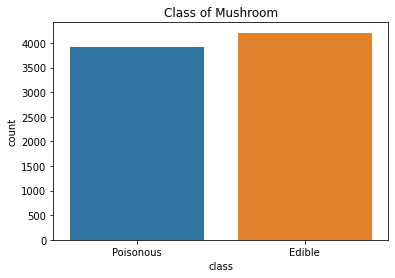

In [82]:
ax = sns.countplot(data=ml_df, x='class')
ax.set(title='Class of Mushroom')
ax.set_xticklabels(['Poisonous', 'Edible']);

The class of mushroom is balanced between poisonous or edible.

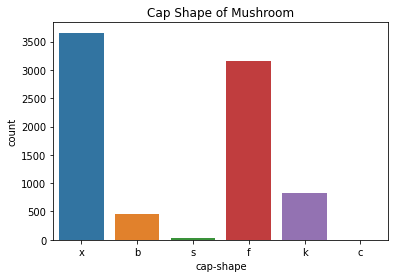

In [83]:
ax = sns.countplot(x ='cap-shape', data=ml_df)
ax.set(title='Cap Shape of Mushroom');

We see the cap shape has a couple of lower outliers and very high outliers. Mushrooms with convex and flat cap shapes are the high outliers. Mushrooms with sunken and conical cap shapes are lower outliers, but they are closer grouped with other entries than our high outliers.

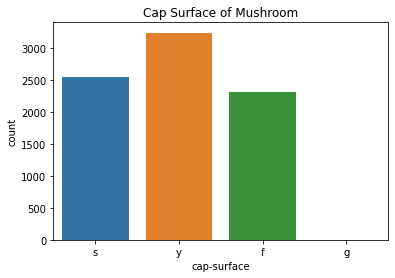

In [84]:
ax = sns.countplot(data=ml_df, x='cap-surface')
ax.set(title='Cap Surface of Mushroom');

Cap surface is balanced aside from a low outlier of grooves.

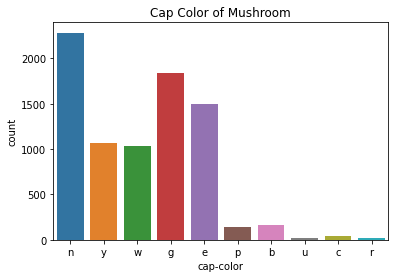

In [85]:
ax = sns.countplot(data=ml_df, x='cap-color')
ax.set(title='Cap Color of Mushroom');

Our data is a little scatter for cap color. We have high and low outliers. The high outlier being brown while the low outliers are pink, buff, purple, cinnamon, and red. 

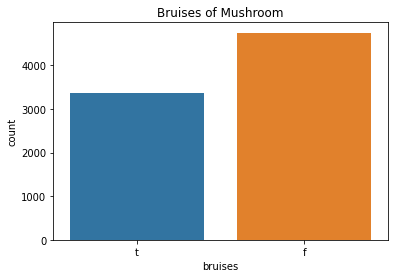

In [87]:
ax = sns.countplot(data=ml_df, x='bruises')
ax.set(title='Bruises of Mushroom');

Bruises of mushrooms is a balanced feature. 

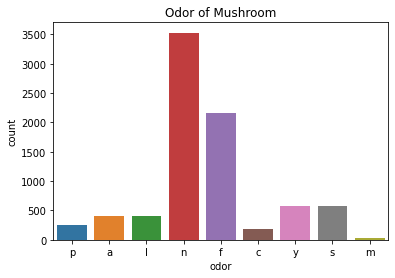

In [88]:
ax = sns.countplot(data=ml_df, x='odor')
ax.set(title='Odor of Mushroom');

Odor of mushroom is relatively balanced with the high outliers being none and foul.

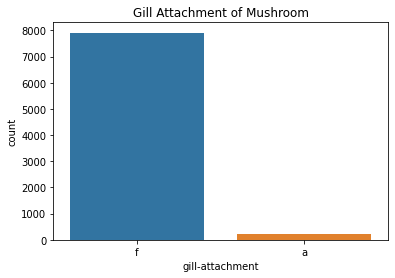

In [89]:
ax = sns.countplot(data=ml_df, x='gill-attachment')
ax.set(title='Gill Attachment of Mushroom');

Gill attachment is a very unbalanced feature. The outlier would be attached gills.

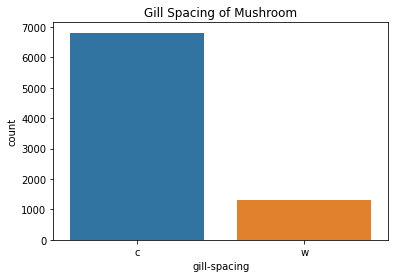

In [90]:
ax = sns.countplot(data=ml_df, x='gill-spacing')
ax.set(title=('Gill Spacing of Mushroom'));

Not as bad as gill attachment, but still an unbalanced feature. The outlier here is crowded spacing. 

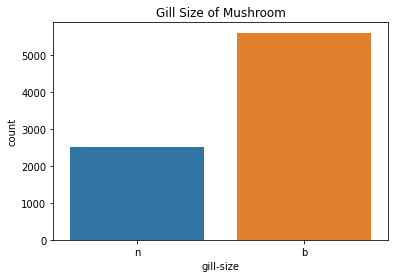

In [91]:
ax = sns.countplot(data=ml_df, x='gill-size')
ax.set(title='Gill Size of Mushroom');

Closer still, but not quite balanced. Gill size outlier is narrow.

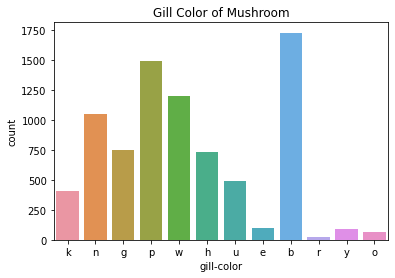

In [92]:
ax = sns.countplot(data=ml_df, x='gill-color')
ax.set(title='Gill Color of Mushroom');

Data is a little more balanced for gill color. The low outliers are red, green, yellow, orange. The high outliers are buff and maybe pink.

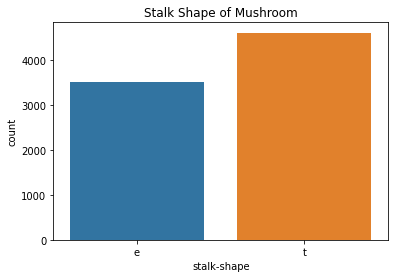

In [93]:
ax = sns.countplot(data=ml_df, x='stalk-shape')
ax.set(title='Stalk Shape of Mushroom');

Balanced feature so no outliers!

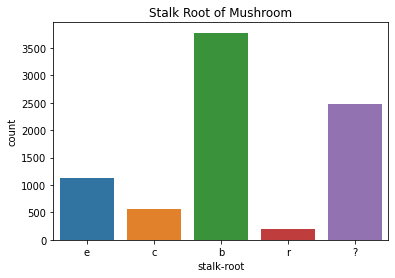

In [94]:
ax = sns.countplot(data=ml_df, x='stalk-root')
ax.set(title='Stalk Root of Mushroom');

Pretty scattered data for stalk root with a high outlier of bulbous and low outliers of club and rhizomorphs. 

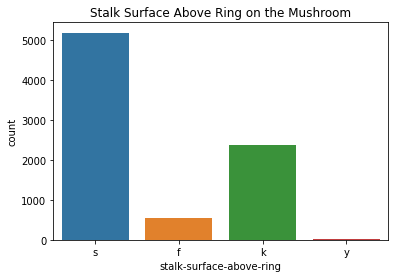

In [95]:
ax = sns.countplot(data=ml_df, x='stalk-surface-above-ring')
ax.set(title='Stalk Surface Above Ring on the Mushroom');

The outliers are scaly and fibrous.

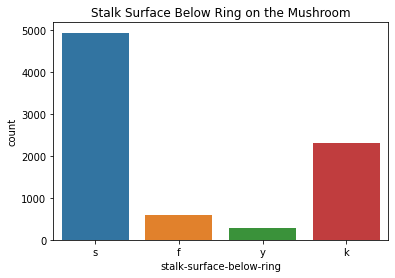

In [96]:
ax = sns.countplot(data=ml_df, x='stalk-surface-below-ring')
ax.set(title='Stalk Surface Below Ring on the Mushroom');

For stalk surface below ring, the outliers are fibrous and scaly. 

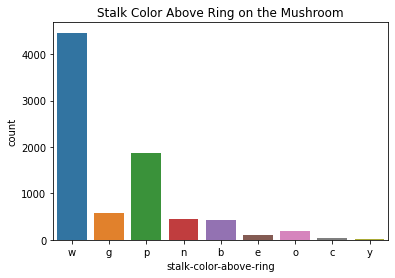

In [97]:
ax = sns.countplot(data=ml_df, x='stalk-color-above-ring')
ax.set(title='Stalk Color Above Ring on the Mushroom');

Outliers are all colors aside from white and pink. 

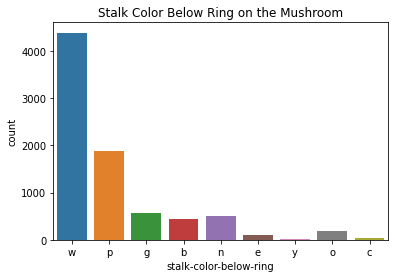

In [98]:
ax = sns.countplot(data=ml_df, x='stalk-color-below-ring')
ax.set(title='Stalk Color Below Ring on the Mushroom');

Outliers are all colors aside from white and pink. 

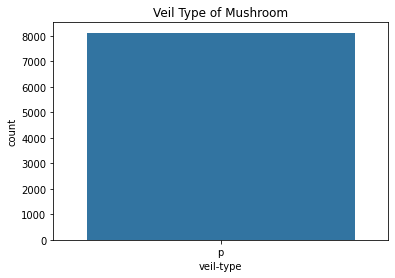

In [99]:
ax = sns.countplot(data=ml_df, x='veil-type')
ax.set(title='Veil Type of Mushroom');

Unbalanced data set considering there is another option 'u' for universal.

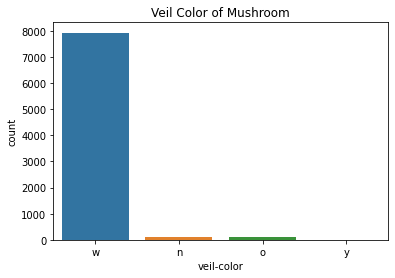

In [100]:
ax = sns.countplot(data=ml_df, x='veil-color')
ax.set(title='Veil Color of Mushroom');

Outliers are all but white. 

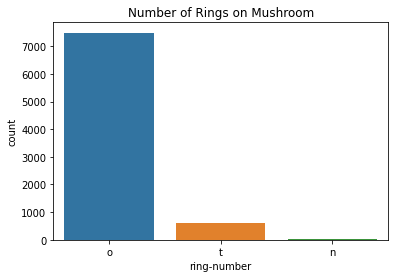

In [101]:
ax = sns.countplot(data=ml_df, x='ring-number')
ax.set(title='Number of Rings on Mushroom');

Ring mushrooms has outliers for two or no rings.

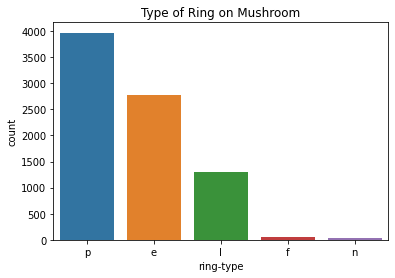

In [102]:
ax = sns.countplot(data=ml_df, x='ring-type')
ax.set(title='Type of Ring on Mushroom');

Type of ring has outliers of flaring and none.

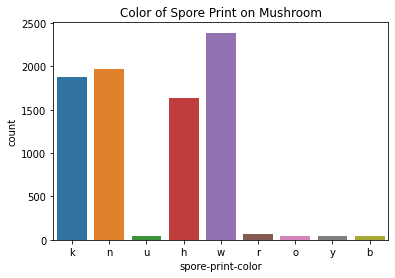

In [103]:
ax = sns.countplot(data=ml_df, x='spore-print-color')
ax.set(title='Color of Spore Print on Mushroom');

Spore print colors has outliers of purple, green, orange, yellow, and buff. 

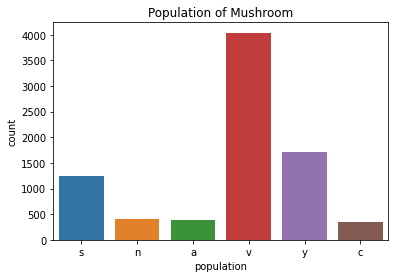

In [104]:
ax = sns.countplot(data=ml_df, x='population')
ax.set(title='Population of Mushroom');

Population of mushrooms outliers are numerous, clustered, and abundant.

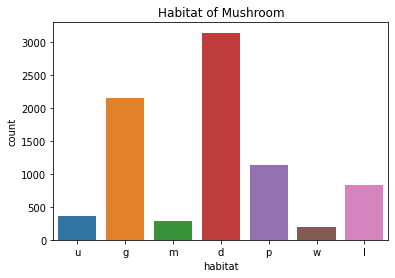

In [105]:
ax = sns.countplot(data=ml_df, x='habitat')
ax.set(title='Habitat of Mushroom');

Habitat of mushrooms outliers are urban, meadows, and waste.